In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

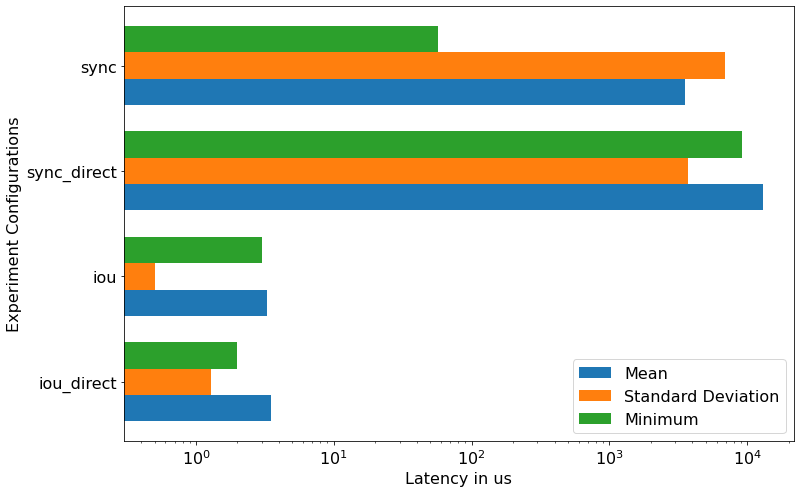

In [56]:
directory = "../report/"

# Initialize empty lists to store statistics
means = []
stds = []
mins = []
bar_labels = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('latency'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]
        std = df.std().values[0]
        minimum = df.min().values[0]
        
        # Append the statistics to the respective lists
        means.append(mean)
        stds.append(std)
        mins.append(minimum)
        new_label = filename[:-4]
        new_label = new_label.replace("latency_", "")
        new_label = new_label.replace("io_uring", "iou")
        bar_labels.append(new_label)

# Plot the statistics as bar graphs
x = np.arange(len(bar_labels))  # X-axis positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(x - width, means, width, label='Mean')
rects2 = ax.barh(x, stds, width, label='Standard Deviation')
rects3 = ax.barh(x + width, mins, width, label='Minimum')

# Add labels to the bars
ax.set_yticks(x)
ax.set_yticklabels(bar_labels)
ax.legend(fontsize=16)

ax.set_xlabel('Latency in us', fontsize=16)
ax.set_ylabel('Experiment Configurations', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


ax.set_xscale('log')
plt.savefig('../report/latency.png')
plt.show()


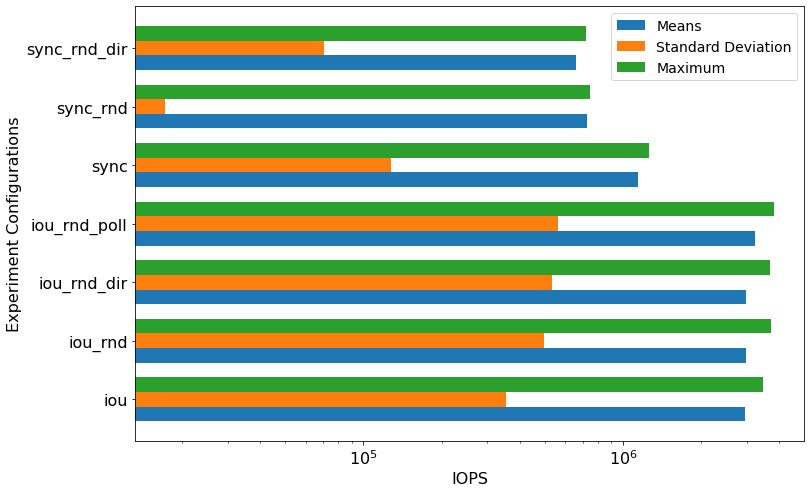

In [62]:
means = []
stds = []
maxs = []
bar_labels = []
# Loop through each file in the directory
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv') and filename.startswith('iops'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]
        std = df.std().values[0]
        maximum = df.max().values[0]
        
        # Append the statistics to the respective lists
        means.append(mean)
        stds.append(std)
        maxs.append(maximum)
        new_label = filename[:-4]
        new_label = new_label.replace("iops_", "")
        new_label = new_label.replace("io_uring", "iou")
        new_label = new_label.replace("random", "rnd")
        new_label = new_label.replace("direct", "dir")
        bar_labels.append(new_label)

# Plot the statistics as bar graphs
x = np.arange(len(bar_labels))  # X-axis positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.barh(x - width, means, width, label='Means')
rects2 = ax.barh(x, stds, width, label='Standard Deviation')
rects3 = ax.barh(x + width, maxs, width, label='Maximum')

ax.set_yticks(x)
ax.set_yticklabels(bar_labels)
ax.legend(fontsize=14)

ax.set_xscale('log')
ax.set_xlabel('IOPS', fontsize=16)
ax.set_ylabel('Experiment Configurations', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

plt.savefig('../report/iops.png')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


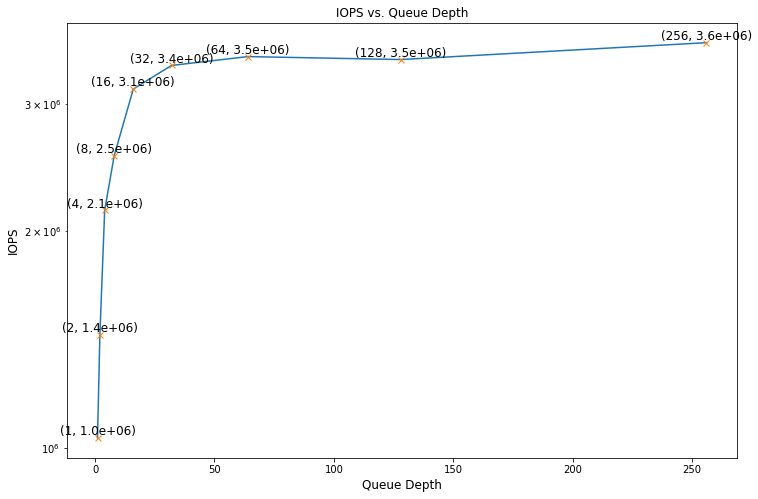

In [91]:
from matplotlib.ticker import ScalarFormatter

means = []
rnd_means = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('qd'):
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate mean, standard deviation, and minimum of the column
        mean = df.mean().values[0]

        new_label = filename[:-4]
        new_label = new_label.replace("qd_", "")
        if(new_label.startswith("rnd_")):
        else:
          qd = int(new_label)
          # Append the statistics to the respective lists
          means.append((int(new_label), mean))


#print(means)

# Sort the means by the parameter
means.sort(key=lambda x: x[0])

# Extract the sorted parameters and means
parameters, means = zip(*means)

plt.figure(figsize=(12, 8))

# Plot the means
plt.plot(parameters, means)
plt.plot(parameters, means, 'x')
plt.xlabel('Queue Depth', fontsize=12)
plt.ylabel('IOPS', fontsize=12)

#plt.xscale('log')
plt.yscale('log')
plt.title('IOPS vs. Queue Depth')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Set the formatter of the y-axis to use scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Add labels to the data points
for parameter, mean in zip(parameters, means):
    plt.text(parameter, mean, f"({parameter}, {mean:.1e})", ha='center', va='bottom', fontsize=12)

plt.savefig('queue_depth.png')
plt.show()